# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.mode.chained_assignment = None

In [ ]:
url = 'https://github.com/Pedro-Grajau/desafio1_trilhas/blob/main/datasetquest.xlsx?raw=True'
data=pd.read_excel(url, 'Rótulo')

In [ ]:
data.columns

Index(['UF', 'idade', 'sexo', 'conseguiu_economizar_2019',
       'vantagem-de- aplicar-dinheiro', 'desvantagem_de_aplicar_dinheiro',
       'conhece_os_tipos_de_investimento',
       ' qual_investimento_aplica_atualmente',
       'qual_pretende_investir_ou_continuar_em_2020',
       '2020_sera_melhor_igual_pior_que_2019', 'pretende_investir_em_2020',
       'Não consigo pensar em aposentadoria, porque não tenho dinheiro suficiente para parar de trabalhar;',
       'Ando preocupado com minha aposentadoria',
       'origem_dinheiro_pra_sustentar_aposentadoria', 'est_civil', 'filhos',
       'escolaridade', 'renda', 'reg_metrop', 'reg_geografica'],
      dtype='object')

Alguns Testes previos

In [ ]:
datama = data.query('UF == "MA"')
datama.fillna(0, inplace=True)

In [ ]:
datama.shape

(46, 20)

### IDADE

In [ ]:
import sys

datama['grupo_idades']=pd.cut(
   datama['idade'],
   bins=[16, 25, 35, 45, 60, sys.maxsize],
   labels=['16 a 24 anos', '25 a 34 anos', '35 a 44 anos', 
           '45 a 59 anos', 'Mais de 60 anos']
)

idade_porcentagem = round(datama['grupo_idades'].
                          value_counts() * 100 / datama.shape[0], 2)

In [ ]:
import seaborn as sns

df = idade_porcentagem.to_frame()
df['grupo_idades'] = df.index
df['porcentagem'] = idade_porcentagem.values
df.index = range(df.shape[0])

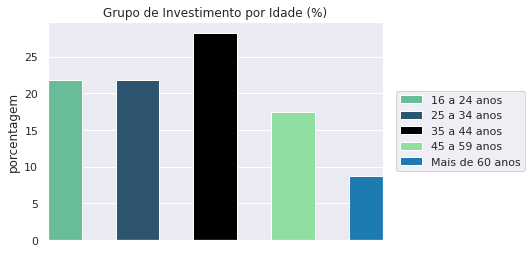

In [ ]:
sns.set_theme()
colors = ["#57CC99", "#22577A", "#000000", "#80ED99", "#0582CA"]
#colors = ["#22003C", "#381A50", "#500399", "#7335AD", "#900FE3"]
sns.set_palette(sns.color_palette(colors))

def change_width(ax, new_value):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

ax = sns.barplot(x="grupo_idades", y="porcentagem", hue="grupo_idades", 
                 data=df)

ax.set(xticklabels=[]) 
ax.set(xlabel=None)

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
change_width(ax, .65)
plt.title('Grupo de Investimento por Idade (%)')
plt.show()

### SEXO

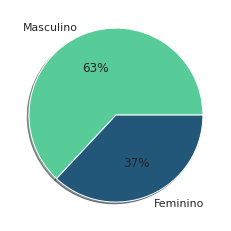

In [ ]:
#colors = ["#500399", "#900FE3"]
colors = ["#57CC99", "#22577A"]
sns.set_palette(sns.color_palette(colors))
sexo_porcentagem = round(datama['sexo'].
                          value_counts() * 100 / datama.shape[0], 2)

labels = ['Masculino', 'Feminino']
data = sexo_porcentagem.values
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', shadow = True)
plt.show()

### CONSEGUI ECONOMIZAR

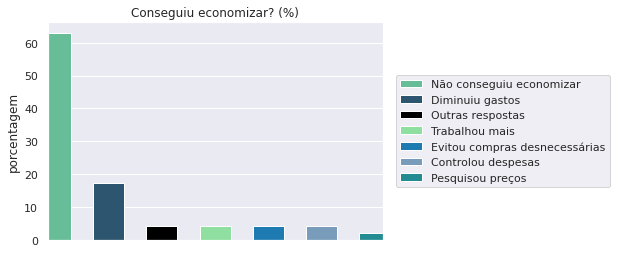

In [ ]:
colors = ["#57CC99", "#22577A", "#000000", "#80ED99", "#0582CA", "#6D9DC5", "#119DA4"]
sns.set_palette(sns.color_palette(colors))

conseguiu_economizar = round(datama['conseguiu_economizar_2019'].
                          value_counts() * 100 / datama.shape[0], 2)

df = conseguiu_economizar.to_frame()
df['respostas'] = ['Não conseguiu economizar', 'Diminuiu gastos',
                   'Outras respostas', 'Trabalhou mais',
                   'Evitou compras desnecessárias', 'Controlou despesas',
                   'Pesquisou preços']
df['porcentagem'] = conseguiu_economizar.values
df.index = range(df.shape[0])

ax = sns.barplot(x="respostas", y="porcentagem", hue="respostas", 
                 data=df)

ax.set(xticklabels=[]) 
ax.set(xlabel=None)

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
change_width(ax, .65)
plt.title('Conseguiu economizar? (%)')
plt.show()

### VANTAGEM EM APLICAR DINHEIRO

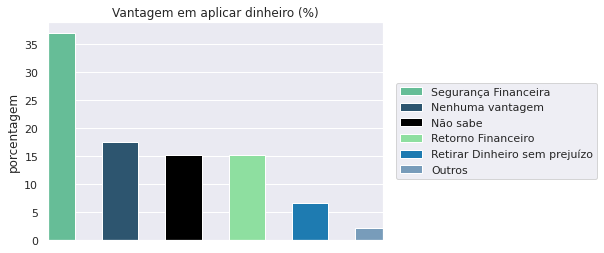

In [ ]:
colors = ["#57CC99", "#22577A", "#000000", "#80ED99", "#0582CA", "#6D9DC5", "#119DA4"]
sns.set_palette(sns.color_palette(colors))

vantagem = round(datama['vantagem-de- aplicar-dinheiro'].
                          value_counts() * 100 / datama.shape[0], 2)
vantagem = vantagem.iloc[:6]
df = vantagem.to_frame()
df['respostas'] = ['Segurança Financeira', 'Nenhuma vantagem',
                   'Não sabe', 'Retorno Financeiro',
                   'Retirar Dinheiro sem prejuízo', 'Outros']
df['porcentagem'] = vantagem.values
df.index = range(df.shape[0])

ax = sns.barplot(x="respostas", y="porcentagem", hue="respostas", 
                 data=df)

ax.set(xticklabels=[]) 
ax.set(xlabel=None)

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
change_width(ax, .65)
plt.title('Vantagem em aplicar dinheiro (%)')
plt.show()

### DESVANTAGEM EM APLICAR O DINHEIRO

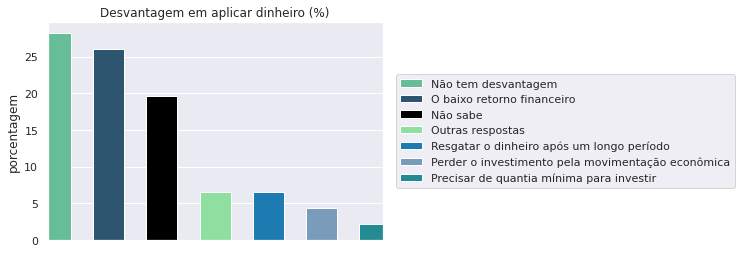

In [ ]:
colors = ["#57CC99", "#22577A", "#000000", "#80ED99", "#0582CA", "#6D9DC5", "#119DA4"]
sns.set_palette(sns.color_palette(colors))

desvantagem = round(datama['desvantagem_de_aplicar_dinheiro'].
                          value_counts() * 100 / datama.shape[0], 2)
desvantagem = desvantagem.iloc[:7]
df = desvantagem.to_frame()
df['respostas'] = ['Não tem desvantagem', 'O baixo retorno financeiro',
                   'Não sabe', 'Outras respostas',
                   'Resgatar o dinheiro após um longo período', 
                   'Perder o investimento pela movimentação econômica',
                   'Precisar de quantia mínima para investir']

df['porcentagem'] = desvantagem.values
df.index = range(df.shape[0])

ax = sns.barplot(x="respostas", y="porcentagem", hue="respostas", 
                 data=df)

ax.set(xticklabels=[]) 
ax.set(xlabel=None)

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
change_width(ax, .65)
plt.title('Desvantagem em aplicar dinheiro (%)')
plt.show()

### CONHECE OS TIPOS DE INVESTIMENTO

In [ ]:
datama['conhece_os_tipos_de_investimento'].value_counts()

Não conhece nenhum tipo de investimento/ Não utiliza nenhum/ Não pretende continuar investindo    26
Outras respostas                                                                                   6
Caderneta de poupança                                                                              5
Fundos de investimentos, como Renda Fixa, Multimercado, Fundo cambial, Fundos de ações, etc.       4
Títulos públicos via tesouro direto (pré-fixados, pós-fixados e de inflação).                      2
Compra e venda de imóveis                                                                          2
Ações na bolsa de valores                                                                          1
Name: conhece_os_tipos_de_investimento, dtype: int64

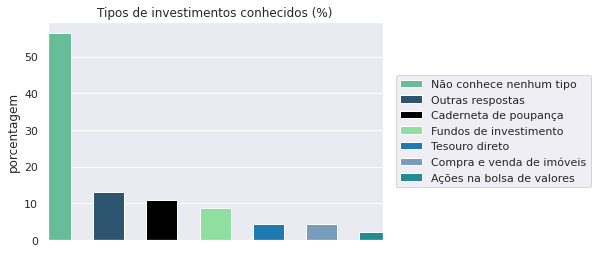

In [ ]:
colors = ["#57CC99", "#22577A", "#000000", "#80ED99", "#0582CA", "#6D9DC5", "#119DA4"]
sns.set_palette(sns.color_palette(colors))

conhece_investimento = round(datama['conhece_os_tipos_de_investimento'].
                          value_counts() * 100 / datama.shape[0], 2)

df = conhece_investimento.to_frame()
df['respostas'] = ['Não conhece nenhum tipo', 'Outras respostas',
                   'Caderneta de poupança', 'Fundos de investimento',
                   'Tesouro direto', 'Compra e venda de imóveis',
                   'Ações na bolsa de valores']

df['porcentagem'] = conhece_investimento.values
df.index = range(df.shape[0])

ax = sns.barplot(x="respostas", y="porcentagem", hue="respostas", 
                 data=df)

ax.set(xticklabels=[]) 
ax.set(xlabel=None)

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
change_width(ax, .65)
plt.title('Tipos de investimentos conhecidos (%)')
plt.show()

### QUAL INVESTIMENTO APLICA ATUALMENTE

In [ ]:
datama[' qual_investimento_aplica_atualmente'].value_counts()

Não conhece nenhum tipo de investimento/ Não utiliza nenhum/ Não pretende continuar investindo    25
Caderneta de poupança                                                                             15
Outras respostas                                                                                   2
Compra e venda de imóveis                                                                          2
0                                                                                                  2
Name:  qual_investimento_aplica_atualmente, dtype: int64

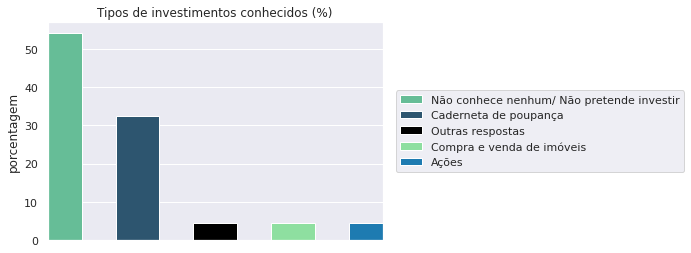

In [ ]:
colors = ["#57CC99", "#22577A", "#000000", "#80ED99", "#0582CA", "#6D9DC5", "#119DA4"]
sns.set_palette(sns.color_palette(colors))

investimento_atual = round(datama[' qual_investimento_aplica_atualmente'].
                          value_counts() * 100 / datama.shape[0], 2)

df = investimento_atual.to_frame()
df['respostas'] = ['Não conhece nenhum/ Não pretende investir', 'Caderneta de poupança',
                   'Outras respostas', 'Compra e venda de imóveis',
                   'Ações']

df['porcentagem'] = investimento_atual.values
df.index = range(df.shape[0])

ax = sns.barplot(x="respostas", y="porcentagem", hue="respostas", 
                 data=df)

ax.set(xticklabels=[]) 
ax.set(xlabel=None)

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
change_width(ax, .65)
plt.title('Tipos de investimentos conhecidos (%)')
plt.show()

### QUAL PRETENDE INVESTIR OU CONTINUAR EM 2020

In [ ]:
datama['qual_pretende_investir_ou_continuar_em_2020'].value_counts()

Não conhece nenhum tipo de investimento/ Não utiliza nenhum/ Não pretende continuar investindo    23
Compra e venda de imóveis                                                                          8
Caderneta de poupança                                                                              6
Outras respostas                                                                                   2
0                                                                                                  2
Plano de previdência privada                                                                       1
Títulos públicos via tesouro direto (pré-fixados, pós-fixados e de inflação).                      1
Abrir próprio negócio                                                                              1
Ações na bolsa de valores                                                                          1
Ouro                                                                                       

### 2020 SERÁ IGUAL OU PIOR QUE 2019

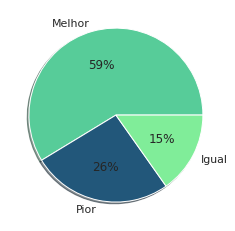

In [ ]:
datama['2020_sera_melhor_igual_pior_que_2019'].value_counts()

colors = ["#57CC99", "#22577A", "#80ED99"]
sns.set_palette(sns.color_palette(colors))
melhor_porcentagem = round(datama['2020_sera_melhor_igual_pior_que_2019'].
                          value_counts() * 100 / datama.shape[0], 2)

labels = ['Melhor', 'Pior', 'Igual']
data = melhor_porcentagem.values
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', shadow = True)
plt.show()

### PRETENDE INVESTIR EM 2020

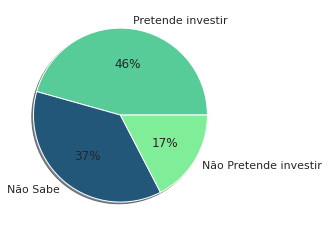

In [ ]:
colors = ["#57CC99", "#22577A", "#80ED99"]
sns.set_palette(sns.color_palette(colors))
melhor_porcentagem = round(datama['pretende_investir_em_2020'].
                          value_counts() * 100 / datama.shape[0], 2)

labels = ['Pretende investir', 'Não Sabe', 'Não Pretende investir']
data = melhor_porcentagem.values
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', shadow = True)
plt.show()

### NÃO CONSEGUE PENSAR EM APOSENTADORIA POR NÃO TER DINHEIRO SUFICIENTE

In [ ]:
datama['Não consigo pensar em aposentadoria, porque não tenho dinheiro suficiente para parar de trabalhar;'].value_counts()

Concorda    27
Discorda    14
0            5
Name: Não consigo pensar em aposentadoria, porque não tenho dinheiro suficiente para parar de trabalhar;, dtype: int64

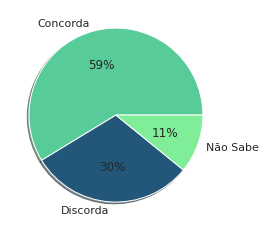

In [ ]:
colors = ["#57CC99", "#22577A", "#80ED99"]
sns.set_palette(sns.color_palette(colors))
melhor_porcentagem = round(datama['Não consigo pensar em aposentadoria, porque não tenho dinheiro suficiente para parar de trabalhar;'].
                          value_counts() * 100 / datama.shape[0], 2)

labels = ['Concorda', 'Discorda', 'Não Sabe']
data = melhor_porcentagem.values
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', shadow = True)
plt.show()

### ORIGEM DO DINHEIRO PARA A APOSENTADORIA

In [ ]:
datama['origem_dinheiro_pra_sustentar_aposentadoria'].value_counts()

Previdência pública (INSS)                                                                        21
Do seu salário/ continuará trabalhando                                                             7
Não sabe                                                                                           5
0                                                                                                  5
De Deus/ Jesus                                                                                     2
Aplicações financeiras, como títulos públicos, mercado de ações, renda fixa, câmbio, poupança.     2
Previdência privada                                                                                2
Pensão/ pensão do marido                                                                           1
Outras respostas                                                                                   1
Name: origem_dinheiro_pra_sustentar_aposentadoria, dtype: int64

### ESTADO CIVIL

In [ ]:
datama['est_civil'].value_counts()

Casado (a)/ com companheiro(a)    27
Solteiro (a)                      16
Viúvo                              2
Separado/ Divorciado               1
Name: est_civil, dtype: int64

# Data

In [ ]:
aposentadoria=datama[datama['Ando preocupado com minha aposentadoria']=='Concorda'].shape[0]
aposentadorianao=datama[datama['Ando preocupado com minha aposentadoria']=='Discorda'].shape[0]
print(round(aposentadoria*100/(aposentadoria+aposentadorianao),2), '% anda preocupado com a aposentadoria')

67.5 % anda preocupado com a aposentadoria


In [ ]:
conheceinvestimento=datama[datama['conhece_os_tipos_de_investimento']!='Não conhece nenhum tipo de investimento/ Não utiliza nenhum/ Não pretende continuar investindo']
conheceinvestimentosuperior=conheceinvestimento[conheceinvestimento['escolaridade'].str.contains('Colegial completo|Pós|Superior')]
print('Dentre as pessoas que conhecem algum tipo de investimento,', conheceinvestimentosuperior.shape[0]*100/conheceinvestimento.shape[0], '% possuem, no mínimo, ensino médio completo')

Dentre as pessoas que conhecem algum tipo de investimento, 90.0 % possuem, no mínimo, ensino médio completo


In [ ]:
naoconhecesuperior=naoconhece[naoconhece['escolaridade'].str.contains('Colegial completo|Pós|Superior')]
print('Dentre as pessoas que não conhecem nenhum tipo de investimento,', round(naoconhecesuperior.shape[0]*100/naoconhece.shape[0],2), '% possuem, no mínimo, ensino médio completo')

Dentre as pessoas que não conhecem nenhum tipo de investimento, 57.69 % possuem, no mínimo, ensino médio completo


In [ ]:
conheceinvestimentomasc=conheceinvestimento[conheceinvestimento['sexo']=='Masculino'].shape[0]
print('Dentre as pessoas que conhecem algum tipo de investimento, ',conheceinvestimentomasc*100/conheceinvestimento.shape[0],'% são homens e ',100-(conheceinvestimentomasc*100/conheceinvestimento.shape[0]),'% são mulheres')

Dentre as pessoas que conhecem algum tipo de investimento,  70.0 % são homens e  30.0 % são mulheres


In [ ]:
conheceinvestimentocasado=conheceinvestimento[conheceinvestimento['est_civil'].str.contains('Casado')].shape[0]
print('Dentre os que conhecem algum tipo de investimento, ', conheceinvestimentocasado*100/conheceinvestimento.shape[0],'% é casado (a)')

Dentre os que conhecem algum tipo de investimento,  70.0 % é casado (a)
